In [150]:
import pandas as pd
from sklearn.metrics import accuracy_score,log_loss
from imblearn.over_sampling import SMOTE

In [151]:
diabeties = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [152]:
pd.set_option('display.max_columns',None)

Diabetes_binary: 0 = no diabetes 1 = prediabetes or diabetes

HighBP: 0 = no high BP 1 = high BP (BP = Blood Pressure)

HighChol: 0 = no high cholesterol 1 = high cholesterol

CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

BMI: Body Mass Index


Smoker: Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes

Stroke: (Ever told) you had a stroke. 0 = no 1 = yes

HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes

Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes

Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes

HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

MentHlth: days of poor mental health scale 1-30 days

PhysHlth: physical illness or injury days in past 30 days scale 1-30

DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

Sex: 0 = female 1 = male

Age: 3-level age category: 1 - age 18 to 24, 2 - age 25 to 29, 3 - 30 to 34, 4 - age 35 to 39, ... 13 - age 80 or older

Education: Education level 1 = Never attended school or only kindergarten 2 = elementary

Income: Income scale 1-8 1 = less than  $10000 ,2 = less than $15000 , 3 = less than $20000 ,4 = less than $25000 ,5 = less than $30000 , 6 = less than $35000 ,7 = less than $40000 , 8 = Above $40000

In [153]:
diabeties.head(20)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [154]:
for col in diabeties.columns:
    if len(diabeties[col].unique()) == 2:
        diabeties[col] = diabeties[col].replace({1.0: True, 0.0: False}).astype(str)

        

In [158]:
object_col = diabeties.select_dtypes(include=['object'])
from scipy.stats import chi2_contingency

object_col.drop(['Diabetes_binary'],axis=1,inplace=True)

compare_cols= list(object_col.columns)

compare_cols

def chi2_test(diabeties, column1, column2, significance_level=0.05):
    
    contingency_table = pd.crosstab(diabeties[column1], diabeties[column2])
    
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    h0_status = True if p_value <= significance_level else False

    return {'p_value': p_value, 'h0_rejected': h0_status}

chi2_results = {}



In [159]:

for col in compare_cols:
    chi2_results[col] = chi2_test(diabeties, 'Diabetes_binary', col)['h0_rejected']
    
chi2_results = pd.DataFrame(chi2_results, index=['h0_rejected']).T

display(chi2_results)


,h0_rejected
HighBP,True
HighChol,True
CholCheck,True
Smoker,True
Stroke,True
HeartDiseaseorAttack,True
PhysActivity,True
Fruits,True
Veggies,True
HvyAlcoholConsump,True


In [91]:
diabeties['Stroke'].unique()

array(['False', 'True'], dtype=object)

In [92]:
diabeties.dtypes

Diabetes_binary          object
HighBP                   object
HighChol                 object
CholCheck                object
BMI                     float64
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                 object
Sex                      object
Age                     float64
Education               float64
Income                  float64
dtype: object

In [93]:
diabeties = pd.get_dummies(diabeties)

In [94]:
diabeties

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,Diabetes_binary_False,Diabetes_binary_True,HighBP_False,HighBP_True,HighChol_False,HighChol_True,CholCheck_False,CholCheck_True,Smoker_False,Smoker_True,Stroke_False,Stroke_True,HeartDiseaseorAttack_False,HeartDiseaseorAttack_True,PhysActivity_False,PhysActivity_True,Fruits_False,Fruits_True,Veggies_False,Veggies_True,HvyAlcoholConsump_False,HvyAlcoholConsump_True,AnyHealthcare_False,AnyHealthcare_True,NoDocbcCost_False,NoDocbcCost_True,DiffWalk_False,DiffWalk_True,Sex_False,Sex_True
0,40.0,5.0,18.0,15.0,9.0,4.0,3.0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0
1,25.0,3.0,0.0,0.0,7.0,6.0,1.0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0
2,28.0,5.0,30.0,30.0,9.0,4.0,8.0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
3,27.0,2.0,0.0,0.0,11.0,3.0,6.0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0
4,24.0,2.0,3.0,0.0,11.0,5.0,4.0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,45.0,3.0,0.0,5.0,5.0,6.0,7.0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1
253676,18.0,4.0,0.0,0.0,11.0,2.0,4.0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0
253677,28.0,1.0,0.0,0.0,2.0,5.0,2.0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0
253678,23.0,3.0,0.0,0.0,7.0,5.0,1.0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
diabeties.drop('Diabetes_binary_False',axis=1,inplace=True)

In [97]:
train,test = train_test_split(diabeties,test_size=0.15,stratify=diabeties['Diabetes_binary_True'])

In [98]:
train.shape

(215628, 36)

In [99]:
test.shape

(38052, 36)

In [100]:
x= train.drop('Diabetes_binary_True',axis=1)

In [101]:
y = train['Diabetes_binary_True']

In [102]:
train['Diabetes_binary_True'].value_counts(normalize=True)*100

0    86.066745
1    13.933255
Name: Diabetes_binary_True, dtype: float64

In [103]:
import seaborn as sns

<Axes: xlabel='Diabetes_binary_True', ylabel='Count'>

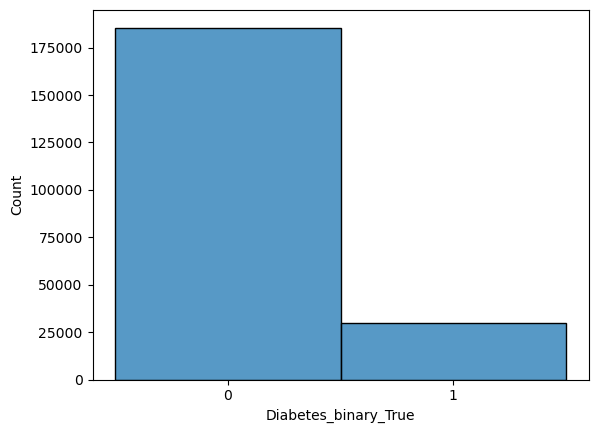

In [109]:
sns.histplot(y.astype(str))

In [105]:
from imblearn.over_sampling import ADASYN

In [106]:
smote = ADASYN(random_state=23,n_neighbors=20)

In [107]:
smote_x,smote_y = smote.fit_resample(x,y)

In [23]:
#from sklearn.decomposition import PCA 

In [24]:
#prcomp = PCA(n_components=0.9)

In [25]:
#smote_x = prcomp.fit_transform(smote_x)

<Axes: xlabel='Diabetes_binary_True', ylabel='Count'>

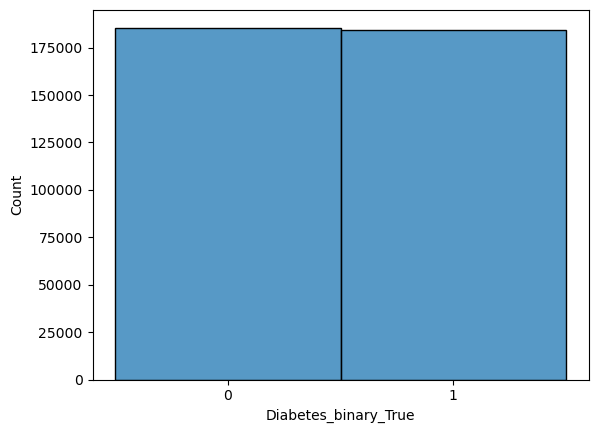

In [108]:
sns.histplot(smote_y.astype(str))

In [110]:
smote_x.shape

(369755, 35)

In [28]:
#diabetes_cleaned_w_smote = pd.DataFrame(smote_x)

In [29]:
#diabetes_cleaned_w_smote

In [30]:
#smote_y

In [31]:
#diabetes_cleaned_w_smote['Diabetes_binary_True']=smote_y

In [32]:
#diabetes_cleaned_w_smote

In [33]:
#diabetes_cleaned_w_smote.to_csv('diabetes_cleaned_smote.csv')

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [112]:
# Logistic Regression

lr = LogisticRegression()
lr.get_params()

lr_params = {'C':np.linspace(0.01,5,10),'l1_ratio':np.linspace(0,1,10),'penalty':['l1','l2','elasticnet',None]}
kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=23)
gcv_lr = GridSearchCV(lr,param_grid=lr_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [113]:
# SVM

svm = SVC()
scaler = StandardScaler()
pipe_svm = Pipeline([('SCL',scaler),('SVM',svm)])
pipe_svm.get_params()

svm_params = {'SVM__kernel':['linear','rbf','poly'],'SVM__probability':[True],'SVM__C':np.linspace(0.01,5,10),'SVM__degree':[2,3],'SVM__gamma':np.linspace(0.001,10,10)}
gcv_svm = GridSearchCV(pipe_svm,param_grid=svm_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [114]:
# Decision Tree

dtc = DecisionTreeClassifier()
dtc.get_params()

dtc_params = {'max_depth':[None,3,4,5,6,7,8],'min_samples_split':[2,5,10,20],'min_samples_leaf':[1,5,10,20]}
gcv_dtc = GridSearchCV(dtc,param_grid=dtc_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [115]:
# Random Forest Classifier

rf = RandomForestClassifier()
rf.get_params()

rf_params = {'max_depth':[None,3,4],'max_features':[5,10,15,20],'n_estimators':[100,200,300,400]}
gcv_rf = GridSearchCV(rf,param_grid=rf_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [116]:
# XGBoost

xgb = XGBClassifier()
xgb.get_params()

xgb_params = {'learning_rate':np.linspace(0.001,0.5,5),'max_depth':[None,2,5],'n_estimators':[100,200]}
gcv_xgb = GridSearchCV(xgb,param_grid=xgb_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [40]:
# Logistic regression fit

gcv_lr.fit(smote_x,smote_y)

print(gcv_lr.best_params_,gcv_lr.best_score_)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
V

{'C': 0.01, 'l1_ratio': 0.0, 'penalty': 'l2'} -0.3039327780065491


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
""" SVM fit

gcv_svm.fit(smote_x,smote_y)

print(gcv_svm.best_params_,gcv_svm.best_score_)"""

'# SVM fit\n\ngcv_svm.fit(smote_x,smote_y)\n\nprint(gcv_svm.best_params_,gcv_svm.best_score_)'

In [42]:
# Decision Tree fit

gcv_dtc.fit(smote_x,smote_y)

print(gcv_dtc.best_params_,gcv_dtc.best_score_)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2} -0.33587315244554494


In [43]:
# Random Forest fit

gcv_rf.fit(smote_x,smote_y)

print(gcv_rf.best_params_,gcv_rf.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'max_depth': None, 'max_features': 5, 'n_estimators': 400} -0.2162681416962641


In [44]:
# XGBoost fit

gcv_xgb.fit(smote_x,smote_y)

print(gcv_xgb.best_params_,gcv_xgb.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'learning_rate': 0.2505, 'max_depth': 5, 'n_estimators': 200} -0.18485384828114015


In [45]:
best_gcv_dtc = gcv_dtc.best_estimator_

In [46]:
test_x =test.drop("Diabetes_binary_True",axis=1)
test_y = test['Diabetes_binary_True']

In [47]:
smote_x.shape , test_x.shape

((370042, 35), (38052, 35))

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
pred = best_gcv_dtc.predict(test_x)

In [50]:
accuracy_score(test_y,pred)

0.8218753284978451

In [51]:
best_gcv_RF = gcv_rf.best_estimator_
pred = best_gcv_RF.predict(test_x)
accuracy_score(test_y,pred)

0.855145590244928

In [52]:
best_gcv_xgb = gcv_xgb.best_estimator_
pred = best_gcv_xgb.predict(test_x)
accuracy_score(test_y,pred)

0.8672343109429203

In [53]:
best_gcv_lr = gcv_lr.best_estimator_
pred = best_gcv_lr.predict(test_x)
accuracy_score(test_y,pred)

0.8267896562598549

In [54]:
from sklearn.ensemble import StackingClassifier 


In [55]:
lr = LogisticRegression(C=4.382,penalty='l2',l1_ratio=0.0)
#svm = SVC(probability=True, random_state=23)
dtc = DecisionTreeClassifier(max_depth=8,min_samples_leaf=1,min_samples_split=20,random_state=23)
models = [('LR', lr),('TREE',dtc)]
gbm = XGBClassifier(learning_rate=0.2505,max_depth=5, n_estimators=400,random_state=23)
stack_gbm = StackingClassifier(estimators=models,
                           final_estimator=gbm,
                           passthrough=True)



In [56]:
stack_gbm.fit(smote_x, smote_y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: 

StackingClassifier(estimators=[('LR',
                                LogisticRegression(C=4.382, l1_ratio=0.0)),
                               ('TREE',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_split=20,
                                                       random_state=23))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=F...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2505,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=400, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=23, ...),
                   passthrough=True)

In [57]:
#test_x=prcomp.transform(test_x)
pred = stack_gbm.predict(test_x)

In [58]:
accuracy_score(test_y,pred)

0.8606117943866288

In [59]:
lr = LogisticRegression(C=2.782,penalty='l2',l1_ratio=0.0)
#svm = SVC(probability=True, random_state=23)
dtc = DecisionTreeClassifier(max_depth=8,min_samples_leaf=1,min_samples_split=20,random_state=23)
models = [('LR', lr),('TREE',dtc)]
#gbm = XGBClassifier(learning_rate=0.2505,max_depth=5, n_estimators=200,random_state=23)
rf = RandomForestClassifier(max_depth= None, max_features= 5, n_estimators= 400)
stack = StackingClassifier(estimators=models,
                           final_estimator=rf,
                           passthrough=True)


In [60]:
stack.fit(smote_x, smote_y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: 

StackingClassifier(estimators=[('LR',
                                LogisticRegression(C=2.782, l1_ratio=0.0)),
                               ('TREE',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_split=20,
                                                       random_state=23))],
                   final_estimator=RandomForestClassifier(max_features=5,
                                                          n_estimators=400),
                   passthrough=True)

In [61]:
pred = stack.predict(test_x)
stack_gbm.predict_proba

<bound method StackingClassifier.predict_proba of StackingClassifier(estimators=[('LR',
                                LogisticRegression(C=4.382, l1_ratio=0.0)),
                               ('TREE',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_split=20,
                                                       random_state=23))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=F...
                                                 gpu_id=None, gr

In [62]:
accuracy_score(test_y,pred)

0.8617155471460107

In [63]:
from sklearn.model_selection import cross_val_score

In [117]:
def model(classifier):
    classifier.fit(x,y)
    prediction=classifier.predict(test_x)
    print("Accuracy Score : ",'{0:.2%}'.format(accuracy_score(test_y,prediction)))
    print("log_loss : ",(log_loss(test_y,(classifier.predict_proba(test_x))[:,1])))
  


In [118]:
classifier_lr = LogisticRegression(random_state = 0,C=2.7,penalty= 'l2') 

In [119]:
model(classifier_lr)

Accuracy Score :  86.49%
log_loss :  0.31753265750856513


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
classifier_dt=DecisionTreeClassifier()

In [121]:
model(classifier_dt)

Accuracy Score :  96.40%
log_loss :  1.1241349440077137


In [122]:
dtc = DecisionTreeClassifier()

In [123]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [124]:
print(accuracy_score(test_y, dtc.predict(test_x)))
print(log_loss(test_y,(dtc.predict_proba(test_x))[:,1]))

0.9641280353200883
1.1204130589981076


In [125]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [126]:
rf = RandomForestClassifier()

In [127]:
model(rf)

Accuracy Score :  97.41%
log_loss :  0.1468388198540669


In [128]:
import pickle

In [129]:
filename = 'diabetes_prediction_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [130]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_prediction_model.sav', 'rb'))

In [131]:
feature = rf.feature_importances_
import matplotlib.pyplot as plt

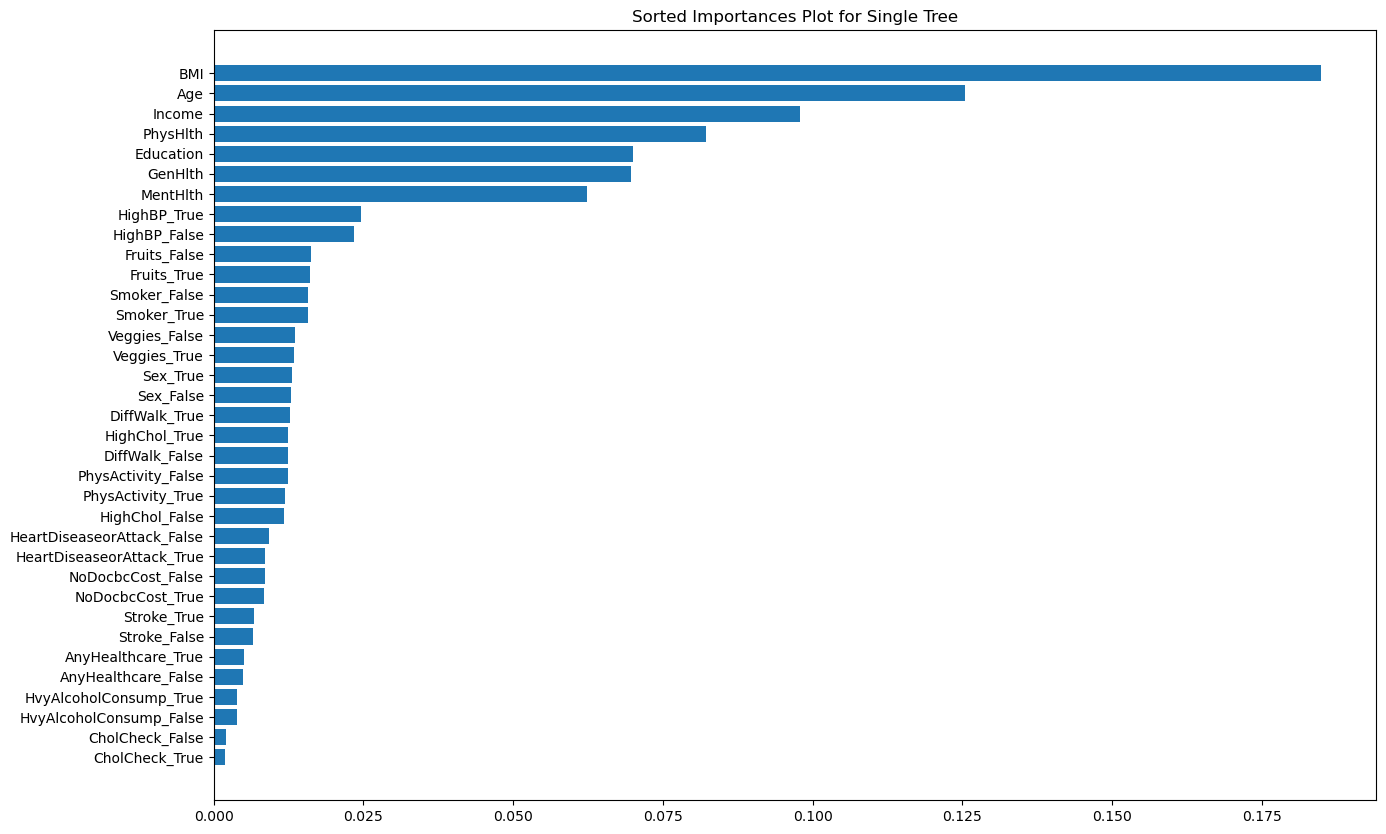

In [135]:
cols = list(x.columns)
imp_df = pd.DataFrame({'feature':cols,
                       'importance':feature})
imp_df.sort_values(by='importance', inplace=True)
plt.figure(figsize=(15,10))
plt.title("Sorted Importances Plot for Single Tree")
plt.barh(imp_df['feature'], imp_df['importance'])
plt.show()

In [137]:
col = list(x.columns)

In [138]:
col

['BMI',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Age',
 'Education',
 'Income',
 'HighBP_False',
 'HighBP_True',
 'HighChol_False',
 'HighChol_True',
 'CholCheck_False',
 'CholCheck_True',
 'Smoker_False',
 'Smoker_True',
 'Stroke_False',
 'Stroke_True',
 'HeartDiseaseorAttack_False',
 'HeartDiseaseorAttack_True',
 'PhysActivity_False',
 'PhysActivity_True',
 'Fruits_False',
 'Fruits_True',
 'Veggies_False',
 'Veggies_True',
 'HvyAlcoholConsump_False',
 'HvyAlcoholConsump_True',
 'AnyHealthcare_False',
 'AnyHealthcare_True',
 'NoDocbcCost_False',
 'NoDocbcCost_True',
 'DiffWalk_False',
 'DiffWalk_True',
 'Sex_False',
 'Sex_True']

In [141]:
o_c

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [149]:
dbb[dbb['Diabetes_binary']==1]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,1.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,1.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,1.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
